### Below we got a few basic plots and typical use cases

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

In [117]:
df = pd.read_csv('csv/vgsales.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  int64  
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


#### 0. plt (matplotlib.pyplot) will be responsible for our canvas. The plotters of it can be either Seaborn (sns) or pandas.[df or Series]

#### 1. Quick Overview Plots with Pandas

##### Bar plot (value counts)

This provides value counts for all categories in categorical data

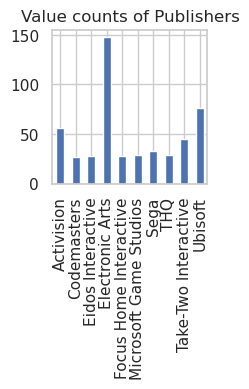

In [16]:
pc_games = df[df['Platform'] == 'PC']
plt.figure(figsize=(2,2))  # This one also empties the canvas, so use it prior to plot.
pc_games['Publisher'].value_counts().sort_index()[pc_games['Publisher'].value_counts() > 25].plot(kind='bar')
plt.title('Value counts of Publishers')
plt.show()


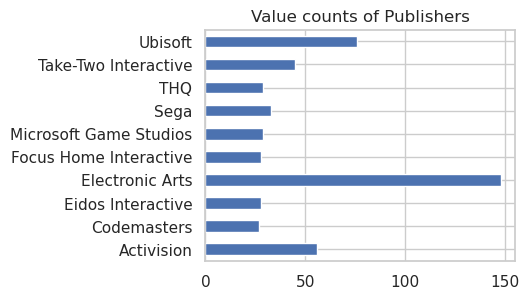

In [17]:
pc_games = df[df['Platform'] == 'PC']
plt.figure(figsize=(4,3))
# We are switching to an horizontal one here
pc_games['Publisher'].value_counts().sort_index()[pc_games['Publisher'].value_counts() > 25].plot(kind='barh')
plt.title('Value counts of Publishers')
plt.show()

We could actually turn all the insignificant values into an 'Others' category.

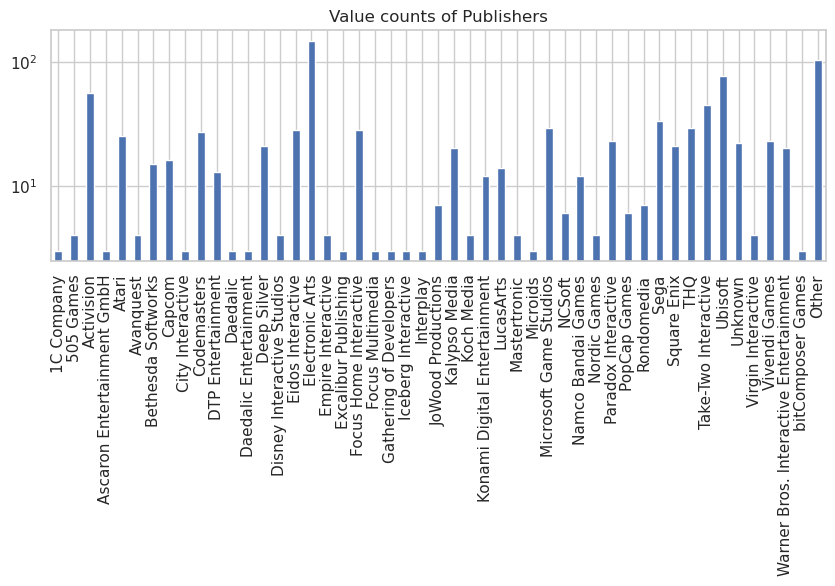

In [43]:
pc_games = df[df['Platform'] == 'PC']
plt.figure(figsize=(10,3))
# We are switching to an horizontal one here
major_pc_games = pc_games['Publisher'].value_counts().sort_index()[pc_games['Publisher'].value_counts() > 2]
other_pc_games = pc_games['Publisher'].value_counts().sort_index()[pc_games['Publisher'].value_counts() <= 2]
major_pc_games['Other'] = other_pc_games.sum()
major_pc_games.plot(kind='bar', logy=True)
# plt.yscale('symlog', linthresh= 10)  # This one sets it to linear up to a point and then logarithmic
# plt.yticks([1, 2, 3, 5, 7, 10, 20, 50, 100])  # this sets the values to tick (used by gridding system)
# plt.gca().set_yticklabels([1, 2, 3, 5, 7, 10, 20, 50, 100])  # maps string labels to ticked values
# plt.grid(axis='y', visible=False)  # show/hide grid
# ax.tick_params(axis='y', which='both', length=5, width=1, direction='out') # used to mark ticks on the axis
plt.title('Value counts of Publishers')
plt.show()

##### Histogram (distribution of numeric column)

This is the equivalent of the bar plot for numerical values. Here we create makeshift categories, with bins.

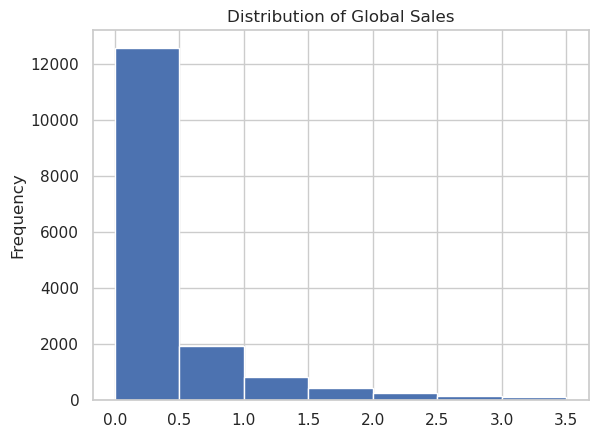

In [122]:
# In this dataset the following plot turns the top performers invisible
bins = [i * 0.5 for i in range(8)]
df['Global_Sales'].plot(kind='hist', bins=bins)
plt.xticks(bins)
# plt.yscale('log')  # This would make the bars appear closer
plt.title('Distribution of Global Sales')
plt.show()

##### Box plot (check outliers)

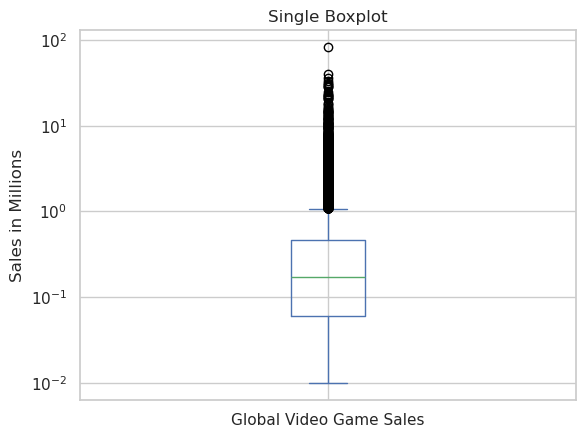

In [74]:
# So to get a better picture we had to use a box plot to deal with the outlier problem, and also a logy (or plt.yscale='log') to deal with the humongous differences in sales.

# .set_xticklabels([''] removes the column name from the bottom
df[['Global_Sales']].plot(kind='box', title="Single Boxplot", logy=True).set_xticklabels(['Global Video Game Sales'])
plt.ylabel("Sales in Millions")
plt.show()


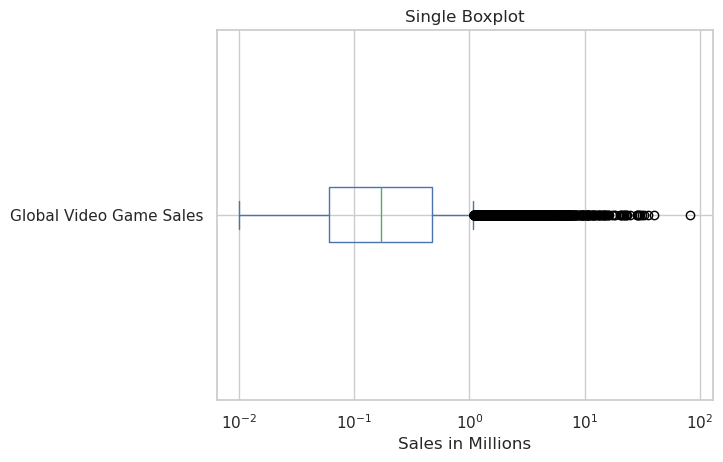

In [77]:
# we can make this horizontal too!

df[['Global_Sales']].plot(kind='box', title="Single Boxplot",vert=False, logx=True).set_yticklabels(['Global Video Game Sales'])
plt.xlabel("Sales in Millions")
plt.show()

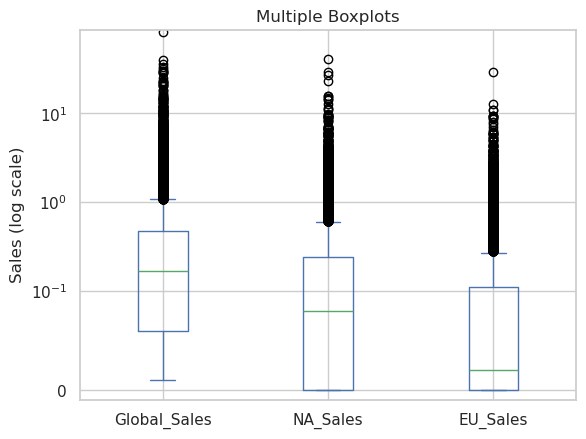

In [104]:
# And just as easily we can have more multiple ones. Also note how we tweaked the scale
df[['Global_Sales', 'NA_Sales', 'EU_Sales']].plot(kind='box', title="Multiple Boxplots").set_ylim(bottom=-0.01)
plt.yscale('symlog', linthresh=0.1)  # linthresh defines the range around 0 that is linear
plt.ylabel("Sales (log scale)")
plt.show()

##### Line plot (time series)

This is the first one requiring more than one Series. It does not look very great, but that's because we only have one entry per year.

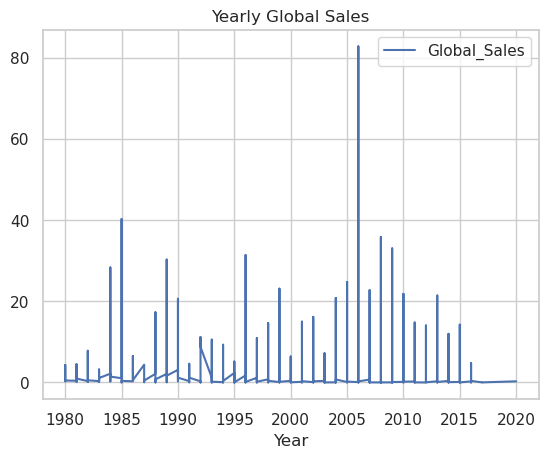

In [114]:

df.sort_values('Year').plot(x='Year', y='Global_Sales')
plt.title('Yearly Global Sales')
plt.show()

#### 2. 🧠 Smarter Plots with Seaborn (EDA-focused)

##### Count plot (like bar chart)
- Provide whole dataframe, and x for Series
- value counts occur automatically

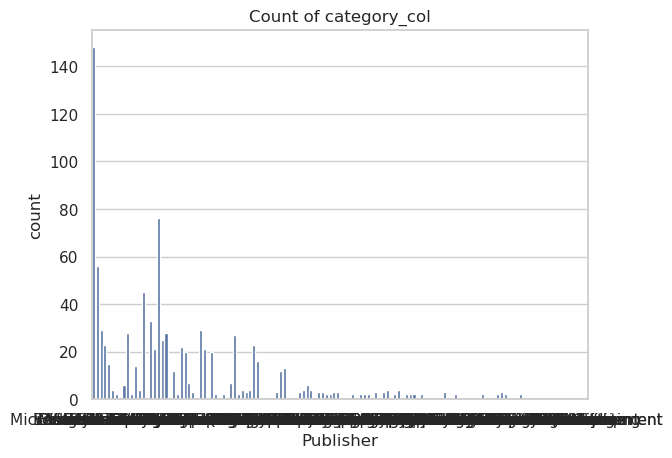

In [93]:
sns.countplot(data=pc_games, x='Publisher')
plt.title('Count of category_col')
plt.show()
# pc_games = df[df['Platform'] == 'PC']
# plt.figure(figsize=(2,2))  # This one also empties the canvas, so use it prior to plot.
# pc_games['Publisher'].value_counts().sort_index()[pc_games['Publisher'].value_counts() > 25].plot(kind='bar')
# plt.title('Value counts of Publishers')
# plt.show()


##### Histogram (with Kernel Density Estimate)

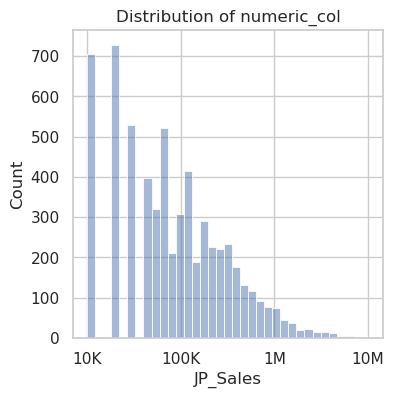

In [58]:

# in contrast to the pandas version this one detects bins a lot better it seems, and it looks much more usable, at least for this Series
plt.figure(figsize=(4,4))  # it works here too
sns.histplot(df['JP_Sales'],kde=True, log_scale=True)  # KDE smooths the histogram
plt.xticks([0.01, 0.1, 1, 10])
plt.gca().set_xticklabels(['10K', '100K', '1M', '10M'])
plt.title('Distribution of numeric_col')
plt.show()

##### Boxplot - super clean way to add multiple box plots

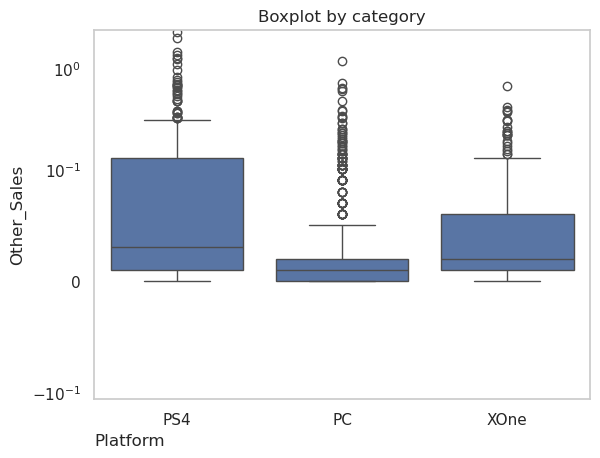

In [ ]:
# df2 = df.dropna(subset=['Platform'])
df2 = df[df['Platform'].isin(['PC', 'XOne', 'PS4'])]
sns.boxplot(data=df2, y='Other_Sales', x='Platform')
plt.yscale('symlog', )
plt.title('Boxplot by category')
plt.xlabel('Platform', loc='left')
plt.grid(False)
plt.show()


##### Scatterplot (for two numerical series - correlation) can add hue to change dot color based on categorical data!

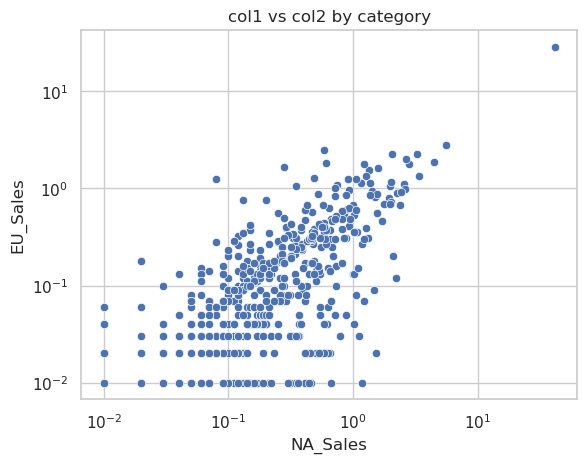

In [79]:
asd = df.loc[:, 'NA_Sales':'EU_Sales'].join(df['Platform']).sample(1000)
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=asd, x='NA_Sales', y='EU_Sales')
plt.title('col1 vs col2 by category')
plt.show()


#### 3. 🧩 Correlation Heatmap

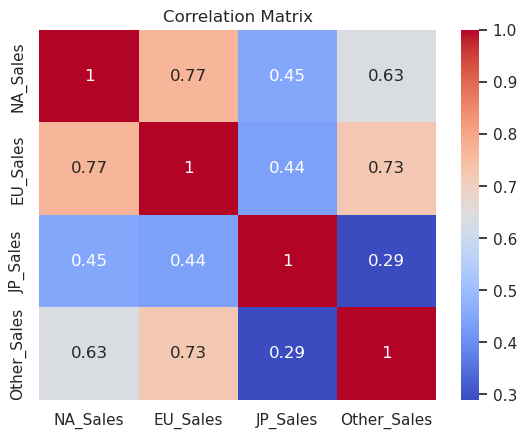

In [130]:
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr(numeric_only=True)  # Turns our numeric columns into a correlation dataframe
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
